In [1]:
# 형태소 분석  Morphological Analysis
# 자연언어의 문장을 '형태소' 라는 의미를 갖는 최소 단위로 분할하고,  품사를 판별하는 작업
# 형태소 분석은 기계번역, 텍스트 마이닝 등의 여러분야에서 활용되고 있슴

In [2]:
# 한국어 문장을 분석할 때 가장 문제가 되는 것은 '단어'를 구분하는 것
# 영어의 경우 공백으로 쉽게 단어 구분이 되지만
# 한국어의 경우 '조사' 가 붙어 있어서 단순히 공백으로 잘라서는 단어 구분이 안됨
# 이번 강의에서는 한국어 문장에서 이를 분석해서 '형태소' 라는 최소 단위로 분석하는
# '형태소 분석' 에 대해 살펴 보겠습니다

In [3]:
# 아시아 계열의 언어의 형태소 분석에는 나름의 노력 필요
# 여러 방법론 중에
#  '문법 규칙에 의한 방법' 과
#  '확률적 언어 모델 을 사용하는 방법' 이 있는데
#  최근에는 '확률적 언어 모델을 사용한 형태소 분석' 이 많아지고 정밀도가 높아짐

# 어쨌거나 두가지 방법 모두 품사 사전과 문법 사전을 기반으로 대조하면서 형태소 분석

In [4]:
# 한국어 형태소 분석 라이브러리
# 파이썬에서 사용할수 있는 것들도 많고, 오픈 된것들이 많음

# KoNLPy  코엔엘파이 http://konlpy.org/ko/latest/   

# 여러 형태소 분석기를 쉽게 사용할수 있도록 함
# Okt(구 twitter), Mecab, 꼬꼬마, Komoran, 한나눔 등...

In [ ]:
# 1. 자바가 설치 되어야 합니다.
# http://konlpy.org/ko/latest/install 참조
# 윈도우의 경우 JDK 설치하고 JAVA_HOME 환경변수 세팅되어야 함

# 2. JPype1 설치   (>= 0.5.7 이상)
#   > pip install JPype1‑1.2.0‑cp38‑cp38‑win_amd64.whl       (whl 다운 받아서 설치하길 추천)
#   > pip install konlpy


In [5]:
import sys
sys.version

'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

In [6]:
!python -V

Python 3.8.5


### jpype 수동 설치

https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

#### konlpy 동작 확인

In [1]:
from konlpy.tag import Okt

In [2]:
okt = Okt()

## 형태소 분석
KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.

    - http://semanticweb.kaist.ac.kr/hannanum/

- Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.

    - http://kkma.snu.ac.kr/

- Komoran: 코모란. Shineware에서 개발.

    - https://github.com/shin285/KOMORAN

- Mecab: 메캡. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.

    - https://bitbucket.org/eunjeon/mecab-ko

- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.

    - https://github.com/open-korean-text/open-korean-text

# 공통적으로 제공하는 메소드
- nouns : 명사 추출

- morphs : 형태소 추출

- pos : 품사 부착

In [3]:
okt.pos("나는 집에 간다", norm=True, stem=True)

[('나', 'Noun'), ('는', 'Josa'), ('집', 'Noun'), ('에', 'Josa'), ('간다', 'Noun')]

In [4]:
okt.pos("나는 집에 갔다", norm=True, stem=True)

[('나', 'Noun'), ('는', 'Josa'), ('집', 'Noun'), ('에', 'Josa'), ('가다', 'Verb')]

In [5]:
okt.pos("나는 집에 가고 있다", norm=True, stem=True)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('집', 'Noun'),
 ('에', 'Josa'),
 ('가다', 'Verb'),
 ('있다', 'Adjective')]

In [6]:
okt.pos("아버지 가방에 들어가신다", norm=True, stem=True)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]

In [7]:
okt.pos("아버지가 방에 들어가신다", norm=True, stem=True)

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가다', 'Verb')]

In [8]:
okt.pos("아버지가방에들어가신다", norm=True, stem=True)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]

In [9]:
# norm 옵션을 지정하면
# "그래욬ㅋㅋ?" 처럼 작성한 경우도  그래요  처럼 변환

# stem 옵션을 지정하면
# "그렇다" 라고 원형을 찾아줌

# KoNLPy 의 5가지 형태소 분석기 중에서 "아버지가방에들어가신다" 를 제대로 분석할수 있는 것은
# Kkma (꼬꼬마), Okt 정도.

# 여러가지 시도해보자

# 자세한 내용은 http://konlpy.org/ko/latest/api/konlpy.tag/ 참조

In [10]:
okt.pos("그래욬ㅋㅋ", norm=True, stem=True)

[('그렇다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]

In [ ]:
# konlpy 품사 태깅
# https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

# Okt 의 경우
# Noun	명사
# Verb	동사
# Adjective	형용사
# Determiner	관형사 (ex: 새, 헌, 참, 첫, 이, 그, 저)
# Adverb	부사 (ex: 잘, 매우, 빨리, 반드시, 과연)
# Conjunction	접속사
# Exclamation	감탄사 (ex:  헐, 어머나, 얼씨구)
# Josa	조사 (ex: 의, 에, 에서)
# PreEomi	선어말어미 (ex: 었)
# Eomi	어미 (ex: 다, 요, 여, 하댘ㅋㅋ)
# Suffix	접미사
# Punctuation	구두점
# Foreign	외국어, 한자 및 기타기호
# Alpha	알파벳
# Number	숫자
# Unknown	미등록어
# KoreanParticle	(ex: ㅋㅋ)
# Hashtag	트위터 해쉬태그 (ex: #히히)
# ScreenName	트위터 아이디 (ex: @echojuliett)
# Email	이메일 주소
# URL	웹주소

## 출현빈도 분석

- 말뭉치 (corpus) 파일

- https://ithub.korean.go.kr/user/corpus/corpusManager.do

In [17]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt

In [12]:
# 박경리의 '토지'를 사용
# 국립국어원 언어 정보 나눔터에서 "토지" 검색해더 다운
# 8개의 파일

# 회원가입 하고 다운 받아야 함.  '    --  '들어가기' 란 '로그인' 을 의미
#  https://ithub.korean.go.kr/user/corpus/corpusManager.do


# 말뭉치 파일 (corpus file)

#### utf-16 인코딩으로 파일을 열기

In [18]:
filepath = r'D:\DevRoot\DataSet\korean\BEXX0003.txt'
fp = codecs.open(filepath, 'r', encoding='utf-16')
soup = BeautifulSoup(fp, 'html.parser')

In [19]:
body = soup.select_one("body > text")
text = body.getText()

In [20]:
text[:200]

'\n제1편 어둠의 발소리\n서(序)\n1897년의 한가위.\n까치들이 울타리 안 감나무에 와서 아침 인사를 하기도 전에, 무색 옷에 댕기꼬리를 늘인 아이들은 송편을 입에 물고 마을길을 쏘다니며 기뻐서 날뛴다. 어른들은 해가 중천에서 좀 기울어질 무렵이래야, 차례를 치러야 했고 성묘를 해야 했고 이웃끼리 음식을 나누다 보면 한나절은 넘는다. 이때부터 타작마당에 사람'

#### 텍스트를 한 줄로 처리

In [21]:
lines = text.split("\n")

#### 명사(noun) 만 카운트

In [25]:
word_dic = {}
for line in lines:
    malist = okt.pos(line)
#     print(malist)
    for word in malist:
        if word[1] == "Noun":  # 명사인 경우
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1

word_dic

{'제': 90,
 '편': 20,
 '어둠': 20,
 '발': 44,
 '소리': 196,
 '한가위': 4,
 '까치': 4,
 '울타리': 30,
 '안': 304,
 '감나무': 3,
 '아침': 17,
 '인사': 17,
 '전': 45,
 '무색': 1,
 '옷': 28,
 '댕기': 13,
 '꼬리': 8,
 '늘': 18,
 '아이': 88,
 '송편': 1,
 '입': 61,
 '물': 46,
 '마을': 111,
 '길': 194,
 '어른': 30,
 '해': 59,
 '중천': 3,
 '좀': 70,
 '무렵': 16,
 '래야': 11,
 '차례': 3,
 '성묘': 1,
 '이웃': 8,
 '끼리': 7,
 '음식': 6,
 '한나절': 1,
 '때': 139,
 '마당': 51,
 '사람': 167,
 '이기': 16,
 '시작': 29,
 '남정': 9,
 '노인': 14,
 '아낙': 38,
 '채비': 4,
 '수': 134,
 '것': 644,
 '식구': 8,
 '시중': 1,
 '간수': 1,
 '자신': 28,
 '치장': 1,
 '남아': 8,
 '이': 148,
 '바람': 72,
 '고개': 24,
 '벼': 2,
 '이삭': 1,
 '황금': 3,
 '빛': 35,
 '물결': 3,
 '들판': 28,
 '마음': 64,
 '떼': 7,
 '향연': 1,
 '이이': 2,
 '놈': 180,
 '극성': 1,
 '새': 35,
 '할망구': 8,
 '와삭': 2,
 '풀발': 1,
 '선': 12,
 '출입': 4,
 '굿': 17,
 '보고': 69,
 '추석': 1,
 '남녀': 5,
 '노유': 1,
 '뿐': 29,
 '강아지': 11,
 '돼지': 5,
 '소나': 12,
 '말': 485,
 '시궁창': 1,
 '쥐': 13,
 '새끼': 21,
 '포식': 1,
 '날인': 1,
 '장단': 7,
 '꽹과리': 8,
 '여음': 1,
 '징': 7,
 '거리': 38,
 '최': 110,
 '참판':

### 가장 많이 등장한 명사 n개 출력

In [26]:
keys = sorted(word_dic.items(), key = lambda x : x[1], reverse= True)

keys[:50] # 상위 50개 출력

[('것', 644),
 ('그', 554),
 ('말', 485),
 ('안', 304),
 ('소리', 196),
 ('길', 194),
 ('용이', 193),
 ('눈', 188),
 ('놈', 180),
 ('내', 174),
 ('사람', 167),
 ('봉', 165),
 ('치수', 160),
 ('평산', 160),
 ('얼굴', 156),
 ('거', 152),
 ('네', 151),
 ('일', 149),
 ('이', 148),
 ('못', 147),
 ('댁', 141),
 ('생각', 141),
 ('때', 139),
 ('강청댁', 137),
 ('수', 134),
 ('서방', 131),
 ('집', 131),
 ('나', 122),
 ('더', 120),
 ('서희', 119),
 ('머', 116),
 ('어디', 112),
 ('마을', 111),
 ('최', 110),
 ('년', 109),
 ('김', 99),
 ('칠성', 97),
 ('구천이', 96),
 ('니', 96),
 ('뒤', 91),
 ('제', 90),
 ('날', 90),
 ('아이', 88),
 ('하나', 84),
 ('녀', 83),
 ('두', 83),
 ('참판', 82),
 ('월', 82),
 ('손', 81),
 ('임', 79)]

In [28]:
words = {}

for word, count in keys[:30]:
    words[word] = count
    
words

{'것': 644,
 '그': 554,
 '말': 485,
 '안': 304,
 '소리': 196,
 '길': 194,
 '용이': 193,
 '눈': 188,
 '놈': 180,
 '내': 174,
 '사람': 167,
 '봉': 165,
 '치수': 160,
 '평산': 160,
 '얼굴': 156,
 '거': 152,
 '네': 151,
 '일': 149,
 '이': 148,
 '못': 147,
 '댁': 141,
 '생각': 141,
 '때': 139,
 '강청댁': 137,
 '수': 134,
 '서방': 131,
 '집': 131,
 '나': 122,
 '더': 120,
 '서희': 119}

In [29]:
import wordcloud
import matplotlib.pyplot as plt

In [33]:
wc = wordcloud.WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf')
wc

In [34]:
cloud = wc.generate_from_frequencies(words)
cloud

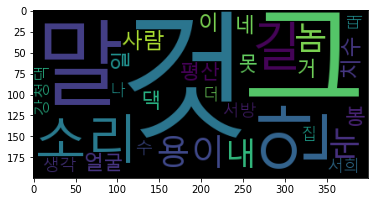

In [35]:
plt.imshow(cloud)
plt.show()